In [1]:
## Figures adapted from: http://sociograph.blogspot.com/2012/11/visualizing-adjacency-matrices-in-python.html

In [2]:
from __future__ import division
import os
import igraph
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats.kde import gaussian_kde
from matplotlib.ticker import FixedLocator,LinearLocator,MultipleLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1 import Grid
import networkx as nx
from matplotlib import pyplot, patches
import numpy as np
from collections import defaultdict

# relevant python libraries
execfile('../functions/python_libraries.py')
execfile('../functions/create_oSBM_class_specific_alternative.py')
execfile('../functions/compute_homophily.py')
execfile('../functions/compute_monophily.py')

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/kristen/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/kristen/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
def draw_adjacency_matrix_modified(adjacency_matrix, plt_name=None, 
                                   partitions=[], colors=[],
                                  partition_indicator = False):
    plt_name.imshow(adjacency_matrix,
                  cmap="binary",
                  interpolation="nearest")
    plt_name.spines["right"].set_linewidth(0.5)
    plt_name.spines["left"].set_linewidth(0.5)
    plt_name.spines["bottom"].set_linewidth(0.5)
    plt_name.spines["top"].set_linewidth(0.5)
    plt_name.spines["right"].set_color('lightgray')
    plt_name.spines["left"].set_color('lightgray')
    plt_name.spines["bottom"].set_color('lightgray')
    plt_name.spines["top"].set_color('lightgray')
    
    if partition_indicator:
        assert len(partitions) == len(colors)
        for partition, color in zip(partitions, colors):
            current_idx = 0
            for module in partition:
                plt_name.add_patch(patches.Rectangle((current_idx, current_idx),
                                              len(module), # Width
                                              len(module), # Height
                                              facecolor="none",
                                              edgecolor=color,
                                              linewidth="1"))
                current_idx += len(module)

In [4]:
def assignmentArray_to_lists(assignment_array):
    by_attribute_value = defaultdict(list)
    for node_index, attribute_value in enumerate(assignment_array):
        by_attribute_value[attribute_value].append(node_index)
    return by_attribute_value.values()



In [5]:
test = pd.read_csv('../../figures/toyA.csv', header=-1)
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
1,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN
3,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [6]:
adj = np.matrix(np.nan_to_num(test))
np.shape(adj)

(12, 12)

In [7]:
print np.mean(adj!=adj.T)

0.0


In [8]:
y_toy = np.array([1,1,1,1,1,1,2,2,2,2,2,2])
from __future__ import division

In [9]:
print len(y_toy)
print np.shape(adj)

12
(12, 12)


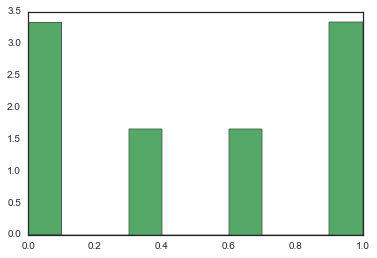

In [10]:
%matplotlib inline
plt.hist(adj[y_toy==1,:] * np.matrix(y_toy==1).T/(np.sum(adj[y_toy==1],1)),
        normed=True)
plt.hist(adj[y_toy==2,:] * np.matrix(y_toy==2).T/(np.sum(adj[y_toy==2],1)),
        normed=True)
plt.show()

In [11]:
homophily_index_Jackson_alternative(adj, y_toy)

[0.5, 0.5]

In [12]:
monophily_index_overdispersion_Williams(adj, y_toy)

[0.7362904663334469, 0.7362904663334471]

In [13]:
adj2 = np.matrix(adj)**2
adj2[range(adj2.shape[0]),range(adj2.shape[0])]=0
adj2 = (adj2 >=1)+0

In [14]:
y_toy_assignment = y_toy.copy()
y_toy_lists = assignmentArray_to_lists(y_toy_assignment)

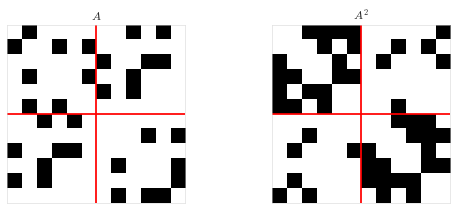

In [15]:
%matplotlib inline
f, (ax1, ax2) = plt.subplots(1, 2, 
                             sharey=False, sharex=False,
                            figsize=(8, 3))




draw_adjacency_matrix_modified(adj,#[idx_amherst,:][idx_amherst,:], #np.concatenate([idx1,idx2]), 
                      partitions=[y_toy_lists],
                      colors=["red"],
                      plt_name=ax1,
                               partition_indicator=False)

ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_title('$A$')
ax1.axvline(5.5, color='red')
ax1.axhline(5.5, color='red')

draw_adjacency_matrix_modified(adj2,#[idx_amherst,:][:,idx_amherst], #np.concatenate([idx1,idx2]), 
                      partitions=[y_toy_lists],
                      colors=["red"],
                      plt_name=ax2,
                              partition_indicator=False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.axvline(5.5, color='red')
ax2.axhline(5.5, color='red')

ax2.set_title('$A^2$')
plt.tight_layout()
#plt.show()
pp = PdfPages('../../figures/figure1b_toy_example.pdf')
pp.savefig(dpi = 300)
pp.close()

In [16]:
## khop spot-check
k_hop = np.array([1,2,3,4,5])
class_values = np.unique(y_toy)

prop_same_array = []
for k in k_hop:  
    print k
    adj_amherst_k= np.matrix(adj)**k
    adj_amherst_k[range(adj_amherst_k.shape[0]),range(adj_amherst_k.shape[0])]=0 ## remove self-loops
                              
    mv_g1 = (adj_amherst_k[y_toy==class_values[0],:] * np.matrix((y_toy==class_values[0])+0).T)/np.sum(adj_amherst_k[y_toy==class_values[0],:],1)
    mv_g2 = (adj_amherst_k[y_toy==class_values[1],:] * np.matrix((y_toy==class_values[1])+0).T)/np.sum(adj_amherst_k[y_toy==class_values[1],:],1)
    proportion_majority_same = np.mean(np.concatenate((np.array(mv_g1).T[0]>np.mean(y_toy==class_values[0]),
                                                        np.array(mv_g2).T[0]>np.mean(y_toy==class_values[1]))))
    prop_same_array.append( proportion_majority_same)

print prop_same_array

1
2
3
4
5
[0.5, 0.66666666666666663, 0.5, 0.66666666666666663, 0.5]
